In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import re
from tqdm.auto import tqdm
import contextily as cx
cx.set_cache_dir("tile_cache")
df = pd.read_excel("Pollution analyses Mapua.xlsx")
df.rename(columns={"Aluminuim": "Aluminium"})
df

,Sediment,Location,Total DDT Isomers,Dieldrin,Aluminuim,Sulphur,Vanadium,Chromium,Manganese,Cobalt,Nickel,Copper,Zinc,Arsenic,Selenium,Silver,Cadmium,Mercury,Lead,Uranium
0,Site 1,"41˚ 15.624'S, 173˚ 5.892'E",0.0075,0.001,16518.912655,1052.643599,42.463242,49.985737,273.474991,8.104016,52.778163,8.868234,35.506181,5.43789,0.991537,0.089184,0.016251,0.154799,8.519661,0.577402
1,Site 2,"41˚ 15.572'S, 173˚ 5.893'E",0.0085,0.001,13182.681372,842.416269,36.994473,45.335967,191.183969,5.621974,35.468645,6.189135,25.626771,4.542981,0.980962,0.262338,0.01262,0.11341,5.90972,0.568269
2,Site 3,"41˚ 15.493'S, 173˚ 5.876'E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Site 4,"41˚ 15.503'S, 173˚ 5.791'E",0.014,0.001,14347.472272,865.1912,38.924618,42.498292,245.347282,6.065827,36.549068,6.342976,29.559022,6.078583,1.004799,0.026049,0.012362,0.027869,6.134818,0.44031
4,Site 5,"41˚ 15.514'S, 173˚ 5.673'E",0.006,0.001,11359.826166,398.808354,38.351538,35.11283,211.319577,5.625269,31.457117,5.143459,23.527645,12.577909,0.867042,0.039512,0.010175,0.016312,7.136776,0.511512
5,Site 6,"41˚ 15.516'S, 173˚ 5.573'E",0.006,0.001,12756.337883,619.394774,50.671753,40.737497,375.535486,7.412915,41.57042,6.000838,27.053254,27.206014,1.024441,0.03496,0.012906,0.017003,11.635085,0.569886
6,Site 7,"41˚ 15.530'S, 173˚ 5.309'E",0.006,0.001,15457.058054,899.500095,40.896228,38.923171,279.821146,7.684669,44.240518,8.256869,32.816672,11.471663,0.97767,0.077509,0.014367,0.018943,7.481523,0.573935
7,Site 8,"41˚ 15.395'S, 173˚ 5.220'E",0.006,0.001,17890.662309,998.201546,45.404394,43.747367,427.318202,8.376312,46.478442,9.123958,35.343672,14.571893,1.142411,0.042442,0.017004,0.020126,8.038082,0.68719
8,Site 9,"41˚ 15.513'S, 173˚ 5.811'E",0.0075,0.001,17473.290669,905.622552,45.969994,49.265992,272.912776,7.716316,48.967096,8.753198,38.218362,7.303673,1.159622,0.069248,0.014839,0.021722,8.128869,0.700793
9,Site 10,"41˚ 15.531'S, 173˚ 5.412'E",0.006,0.001,25411.662513,1709.858197,57.596293,63.408278,386.369163,10.613864,69.300728,13.314035,50.822242,9.160778,1.438946,0.037045,0.020781,0.028689,11.237761,0.705635


In [2]:
def parse_latlong(latlong):
    if type(latlong) is str:
        lat, long = re.findall(r"(\d+)˚ ([\d.]+)'(.)", latlong)
        lat_deg, lat_min, lat_dir = lat
        lon_deg, lon_min, lon_dir = long
        latitude = (float(lat_deg) + float(lat_min) / 60) * (-1 if lat_dir == 'S' else 1)
        longitude = (float(lon_deg) + float(lon_min) / 60) * (-1 if lon_dir == 'W' else 1)
        return Point(longitude, latitude)
str(parse_latlong("41˚ 15.624'S, 173˚ 5.892'E"))

'POINT (173.0982 -41.2604)'

In [5]:
df["geometry"] = df.Location.apply(parse_latlong)
df = gpd.GeoDataFrame(df)
df.crs = 4326
df

,Sediment,Location,Total DDT Isomers,Dieldrin,Aluminuim,Sulphur,Vanadium,Chromium,Manganese,Cobalt,...,Copper,Zinc,Arsenic,Selenium,Silver,Cadmium,Mercury,Lead,Uranium,geometry
0,Site 1,"41˚ 15.624'S, 173˚ 5.892'E",0.0075,0.001,16518.912655,1052.643599,42.463242,49.985737,273.474991,8.104016,...,8.868234,35.506181,5.43789,0.991537,0.089184,0.016251,0.154799,8.519661,0.577402,POINT (173.09820 -41.26040)
1,Site 2,"41˚ 15.572'S, 173˚ 5.893'E",0.0085,0.001,13182.681372,842.416269,36.994473,45.335967,191.183969,5.621974,...,6.189135,25.626771,4.542981,0.980962,0.262338,0.01262,0.11341,5.90972,0.568269,POINT (173.09822 -41.25953)
2,Site 3,"41˚ 15.493'S, 173˚ 5.876'E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (173.09793 -41.25822)
3,Site 4,"41˚ 15.503'S, 173˚ 5.791'E",0.014,0.001,14347.472272,865.1912,38.924618,42.498292,245.347282,6.065827,...,6.342976,29.559022,6.078583,1.004799,0.026049,0.012362,0.027869,6.134818,0.44031,POINT (173.09652 -41.25838)
4,Site 5,"41˚ 15.514'S, 173˚ 5.673'E",0.006,0.001,11359.826166,398.808354,38.351538,35.11283,211.319577,5.625269,...,5.143459,23.527645,12.577909,0.867042,0.039512,0.010175,0.016312,7.136776,0.511512,POINT (173.09455 -41.25857)
5,Site 6,"41˚ 15.516'S, 173˚ 5.573'E",0.006,0.001,12756.337883,619.394774,50.671753,40.737497,375.535486,7.412915,...,6.000838,27.053254,27.206014,1.024441,0.03496,0.012906,0.017003,11.635085,0.569886,POINT (173.09288 -41.25860)
6,Site 7,"41˚ 15.530'S, 173˚ 5.309'E",0.006,0.001,15457.058054,899.500095,40.896228,38.923171,279.821146,7.684669,...,8.256869,32.816672,11.471663,0.97767,0.077509,0.014367,0.018943,7.481523,0.573935,POINT (173.08848 -41.25883)
7,Site 8,"41˚ 15.395'S, 173˚ 5.220'E",0.006,0.001,17890.662309,998.201546,45.404394,43.747367,427.318202,8.376312,...,9.123958,35.343672,14.571893,1.142411,0.042442,0.017004,0.020126,8.038082,0.68719,POINT (173.08700 -41.25658)
8,Site 9,"41˚ 15.513'S, 173˚ 5.811'E",0.0075,0.001,17473.290669,905.622552,45.969994,49.265992,272.912776,7.716316,...,8.753198,38.218362,7.303673,1.159622,0.069248,0.014839,0.021722,8.128869,0.700793,POINT (173.09685 -41.25855)
9,Site 10,"41˚ 15.531'S, 173˚ 5.412'E",0.006,0.001,25411.662513,1709.858197,57.596293,63.408278,386.369163,10.613864,...,13.314035,50.822242,9.160778,1.438946,0.037045,0.020781,0.028689,11.237761,0.705635,POINT (173.09020 -41.25885)


In [6]:
float_cols = df.columns[2:-1]
float_cols

Index(['Total DDT Isomers', 'Dieldrin', 'Aluminuim', 'Sulphur', 'Vanadium',
       'Chromium', 'Manganese', 'Cobalt', 'Nickel', 'Copper', 'Zinc',
       'Arsenic', 'Selenium', 'Silver', 'Cadmium', 'Mercury', 'Lead',
       'Uranium'],
      dtype='object')

In [7]:
sediment = df.iloc[:10].copy()
sediment[float_cols] = sediment[float_cols].astype(float)
sediment

,Sediment,Location,Total DDT Isomers,Dieldrin,Aluminuim,Sulphur,Vanadium,Chromium,Manganese,Cobalt,...,Copper,Zinc,Arsenic,Selenium,Silver,Cadmium,Mercury,Lead,Uranium,geometry
0,Site 1,"41˚ 15.624'S, 173˚ 5.892'E",0.0075,0.001,16518.912655,1052.643599,42.463242,49.985737,273.474991,8.104016,...,8.868234,35.506181,5.437890,0.991537,0.089184,0.016251,0.154799,8.519661,0.577402,POINT (173.09820 -41.26040)
1,Site 2,"41˚ 15.572'S, 173˚ 5.893'E",0.0085,0.001,13182.681372,842.416269,36.994473,45.335967,191.183969,5.621974,...,6.189135,25.626771,4.542981,0.980962,0.262338,0.012620,0.113410,5.909720,0.568269,POINT (173.09822 -41.25953)
2,Site 3,"41˚ 15.493'S, 173˚ 5.876'E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (173.09793 -41.25822)
3,Site 4,"41˚ 15.503'S, 173˚ 5.791'E",0.0140,0.001,14347.472272,865.191200,38.924618,42.498292,245.347282,6.065827,...,6.342976,29.559022,6.078583,1.004799,0.026049,0.012362,0.027869,6.134818,0.440310,POINT (173.09652 -41.25838)
4,Site 5,"41˚ 15.514'S, 173˚ 5.673'E",0.0060,0.001,11359.826166,398.808354,38.351538,35.112830,211.319577,5.625269,...,5.143459,23.527645,12.577909,0.867042,0.039512,0.010175,0.016312,7.136776,0.511512,POINT (173.09455 -41.25857)
5,Site 6,"41˚ 15.516'S, 173˚ 5.573'E",0.0060,0.001,12756.337883,619.394774,50.671753,40.737497,375.535486,7.412915,...,6.000838,27.053254,27.206014,1.024441,0.034960,0.012906,0.017003,11.635085,0.569886,POINT (173.09288 -41.25860)
6,Site 7,"41˚ 15.530'S, 173˚ 5.309'E",0.0060,0.001,15457.058054,899.500095,40.896228,38.923171,279.821146,7.684669,...,8.256869,32.816672,11.471663,0.977670,0.077509,0.014367,0.018943,7.481523,0.573935,POINT (173.08848 -41.25883)
7,Site 8,"41˚ 15.395'S, 173˚ 5.220'E",0.0060,0.001,17890.662309,998.201546,45.404394,43.747367,427.318202,8.376312,...,9.123958,35.343672,14.571893,1.142411,0.042442,0.017004,0.020126,8.038082,0.687190,POINT (173.08700 -41.25658)
8,Site 9,"41˚ 15.513'S, 173˚ 5.811'E",0.0075,0.001,17473.290669,905.622552,45.969994,49.265992,272.912776,7.716316,...,8.753198,38.218362,7.303673,1.159622,0.069248,0.014839,0.021722,8.128869,0.700793,POINT (173.09685 -41.25855)
9,Site 10,"41˚ 15.531'S, 173˚ 5.412'E",0.0060,0.001,25411.662513,1709.858197,57.596293,63.408278,386.369163,10.613864,...,13.314035,50.822242,9.160778,1.438946,0.037045,0.020781,0.028689,11.237761,0.705635,POINT (173.09020 -41.25885)


In [ ]:
for col in tqdm(float_cols):
  ax = sediment.plot(col, figsize=(10,10), legend=True, legend_kwds={"orientation": "horizontal", "pad": 0.05}, cmap="Reds", markersize = 100, edgecolor = "black")
  ax.set_title(f"Sediment {col} in Mapua")
  ax.ticklabel_format(useOffset=False, style='plain')
  xmin, ymin, xmax, ymax = sediment.total_bounds
  pad = .002
  ax.set_xlim(xmin-pad, xmax+pad)
  ax.set_ylim(ymin-pad, ymax+pad)
  cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=sediment.crs, zoom=18)
  file_name = f"Sediment {col} in Mapua.png"
  ax.figure.savefig(file_name, bbox_inches="tight")

In [8]:
titiko = df.iloc[12:22].copy()
titiko[float_cols] = titiko[float_cols].astype(float)
titiko

,Sediment,Location,Total DDT Isomers,Dieldrin,Aluminuim,Sulphur,Vanadium,Chromium,Manganese,Cobalt,...,Copper,Zinc,Arsenic,Selenium,Silver,Cadmium,Mercury,Lead,Uranium,geometry
12,Site 1,"41˚ 15.624'S, 173˚ 5.892'E",0.1119,0.0048,9278.516506,10438.545347,26.122999,27.650273,191.842282,6.302344,...,75.247891,49.645651,13.887514,3.036958,0.176368,0.052238,0.289213,5.886132,0.307983,POINT (173.09820 -41.26040)
13,Site 2,"41˚ 15.572'S, 173˚ 5.893'E",0.1739,0.0083,3045.746777,9779.968577,9.266928,10.447118,87.293664,2.184617,...,55.944349,32.241964,13.957774,2.454535,0.175301,0.040901,0.377740,1.597750,0.163822,POINT (173.09822 -41.25953)
14,Site 3,"41˚ 15.493'S, 173˚ 5.876'E",0.2742,0.0310,1688.387959,8956.741669,7.281270,13.902505,168.717108,1.792196,...,47.170575,27.372176,14.702333,2.223494,0.087140,0.027850,0.181421,1.095187,0.125211,POINT (173.09793 -41.25822)
15,Site 4,"41˚ 15.503'S, 173˚ 5.791'E",0.4465,0.0230,5834.559801,6688.965169,16.851306,17.802685,176.232594,4.467314,...,37.809536,32.459531,13.655855,1.834363,0.207970,0.076393,0.216377,3.078978,0.251346,POINT (173.09652 -41.25838)
16,Site 5,"41˚ 15.514'S, 173˚ 5.673'E",0.0452,0.0026,776.544571,4906.246349,2.118771,2.044623,94.758462,0.811912,...,19.422672,10.663063,6.717349,1.087014,0.148339,0.017945,0.107886,0.532221,0.061831,POINT (173.09455 -41.25857)
17,Site 6,"41˚ 15.516'S, 173˚ 5.573'E",0.0309,0.0015,1498.423285,7484.460630,4.984812,7.125436,114.022396,1.854082,...,50.283271,25.967419,14.104914,2.469336,0.287980,0.040168,0.312954,1.141666,0.112747,POINT (173.09288 -41.25860)
18,Site 7,"41˚ 15.530'S, 173˚ 5.309'E",0.0251,0.0015,2461.750292,13737.544243,6.892372,7.129266,57.248232,1.750822,...,62.373216,37.501330,25.564629,2.140799,0.451634,0.192853,0.094570,1.821799,0.203198,POINT (173.08848 -41.25883)
19,Site 8,"41˚ 15.395'S, 173˚ 5.220'E",0.0276,0.0005,66.047580,12226.537642,0.397430,0.301674,15.563173,0.744519,...,64.524262,29.971684,10.063169,2.498558,0.550304,0.033397,0.163524,0.352246,0.046921,POINT (173.08700 -41.25658)
20,Site 9,"41˚ 15.513'S, 173˚ 5.811'E",0.0774,0.0015,2677.861843,7411.325007,6.881487,7.085678,63.300903,1.397971,...,37.786295,23.023848,10.121427,1.267161,0.047833,0.026337,0.141486,1.747061,0.108743,POINT (173.09685 -41.25855)
21,Site 10,"41˚ 15.531'S, 173˚ 5.412'E",0.0431,0.0005,4030.262350,11537.183933,9.555477,9.870691,84.961609,1.806037,...,48.033265,26.564529,9.444581,2.063936,0.179229,0.025591,0.219650,1.855676,0.136361,POINT (173.09020 -41.25885)


In [ ]:
for col in tqdm(float_cols):
  ax = titiko.plot(col, figsize=(10,10), legend=True, legend_kwds={"orientation": "horizontal", "pad": 0.05}, cmap="Reds", markersize = 100, edgecolor = "black")
  ax.set_title(f"Tītiko (mud-flat snails) {col} in Mapua")
  ax.ticklabel_format(useOffset=False, style='plain')
  xmin, ymin, xmax, ymax = titiko.total_bounds
  pad = .002
  ax.set_xlim(xmin-pad, xmax+pad)
  ax.set_ylim(ymin-pad, ymax+pad)
  cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=sediment.crs, zoom=18)
  file_name = f"Tītiko (mud-flat snails) {col} in Mapua.png"
  ax.figure.savefig(file_name, bbox_inches="tight")

In [3]:
df = pd.read_excel("Kawhia Aotea Sites.xlsx")
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Easting, df.Northing), crs=2193).to_crs(4326)
df

,Easting,Northing,Litres,GPS Conversions to Lat/longs,Unnamed: 4,Unnamed: 5,Unnamed: 6,geometry
0,1763694.677,5798190.746,1.38,174.86309475 -37.94913315,NaN,NaN,"174 51 47.13841 E"" ""37 56 56.91121 S""",POINT (174.86309 -37.94914)
1,1763751.114,5798234.798,0.66,174.86372674 -37.94872615,NaN,NaN,"""174 51 49.41360 E"" ""37 56 55.44601 S""",POINT (174.86373 -37.94874)
2,1763753.514,5798240.523,0.44,174.86375274 -37.94867414,NaN,NaN,"""174 51 49.50720 E"" ""37 56 55.25879 S""",POINT (174.86375 -37.94868)
3,1764016.827,5798413.421,0.83,174.86670874 -37.94706915,NaN,NaN,"""174 52 00.14880 E"" ""37 56 49.48079 S""",POINT (174.86671 -37.94708)
4,1764388.990,5798380.976,0.66,174.87094974 -37.94729415,NaN,NaN,"""174 52 15.41639 E"" ""37 56 50.29080 S""",POINT (174.87095 -37.94730)
...,...,...,...,...,...,...,...,...
56,1763742.772,5779362.750,12.60,174.86794570 -38.11872816,NaN,NaN,"""174 52 04.60200 E"" ""38 07 07.45320 S""",POINT (174.86794 -38.11874)
57,1763389.428,5779153.602,201.60,174.86396470 -38.12067616,NaN,NaN,"""174 51 50.27040 E"" ""38 07 14.46601 S""",POINT (174.86396 -38.12069)
58,1761769.708,5778032.856,3.60,174.84574991 -38.13106353,NaN,NaN,"""174 50 44.69715 E"" ""38 07 51.86054 S""",POINT (174.84575 -38.13107)
59,1762565.842,5777925.431,1.20,174.85485370 -38.13188816,NaN,NaN,"""174 51 17.47081 E"" ""38 07 54.82920 S""",POINT (174.85485 -38.13190)


<Axes: ylabel='Frequency'>

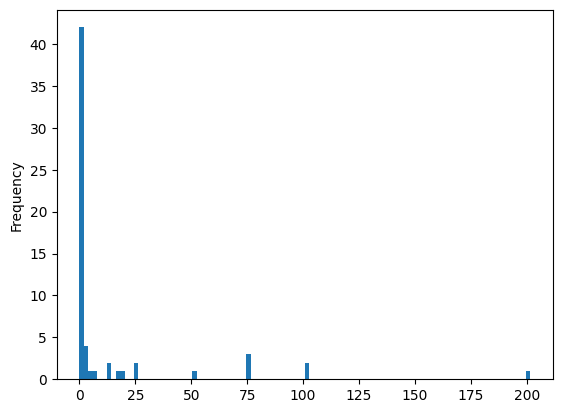

In [4]:
df.Litres.plot.hist(bins=100)

In [5]:
df["lat"] = df.geometry.y
df["lng"] = df.geometry.x

In [6]:
from xyzservices import TileProvider
linz_aerial = TileProvider.from_qms("LINZ NZ Aerial Imagery")
linz_aerial

{'name': 'LINZ NZ Aerial Imagery',
 'url': 'https://basemaps.linz.govt.nz/v1/tiles/aerial/EPSG:3857/{z}/{x}/{y}.jpg?api=d01egend5f8dv4zcbfj6z2t7rs3',
 'min_zoom': 0,
 'max_zoom': 21,
 'attribution': 'Sourced from LINZ CC-BY 4.0'}

In [119]:
from glob import glob
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap

m = df[["Litres", "geometry"]].explore("Litres", name="points", cmap="jet")
HeatMap(df[["lat", "lng", "Litres"]], name="heatmap").add_to(m)
folium.LayerControl(collapsed=False).add_to(m)
m.save("index.html")
m

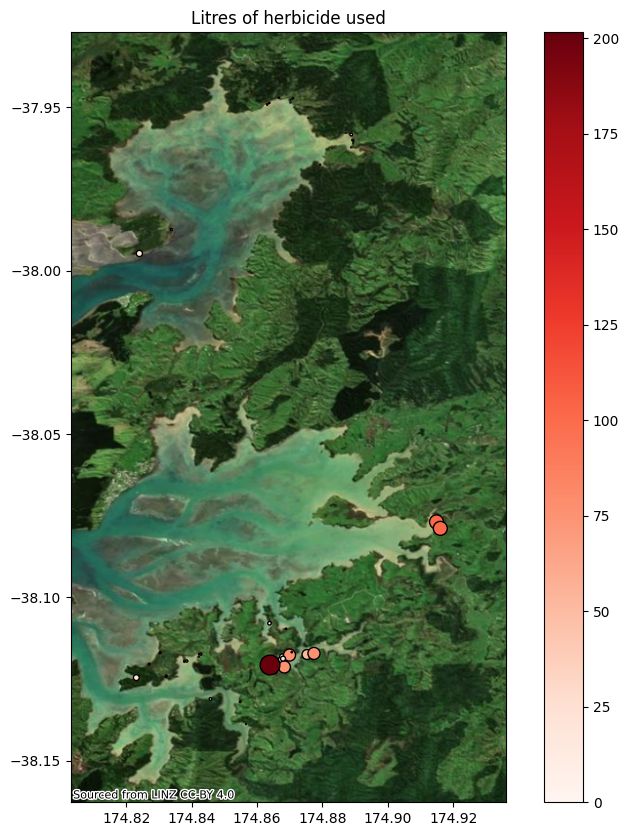

In [7]:
ax = df.plot("Litres", figsize=(10,10), legend=True, cmap="Reds", markersize = "Litres", edgecolor = "black")
ax.set_title(f"Litres of herbicide used")
ax.ticklabel_format(useOffset=False, style='plain')
xmin, ymin, xmax, ymax = df.total_bounds
pad = .02
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)
cx.add_basemap(ax, source=linz_aerial, crs=df.crs)

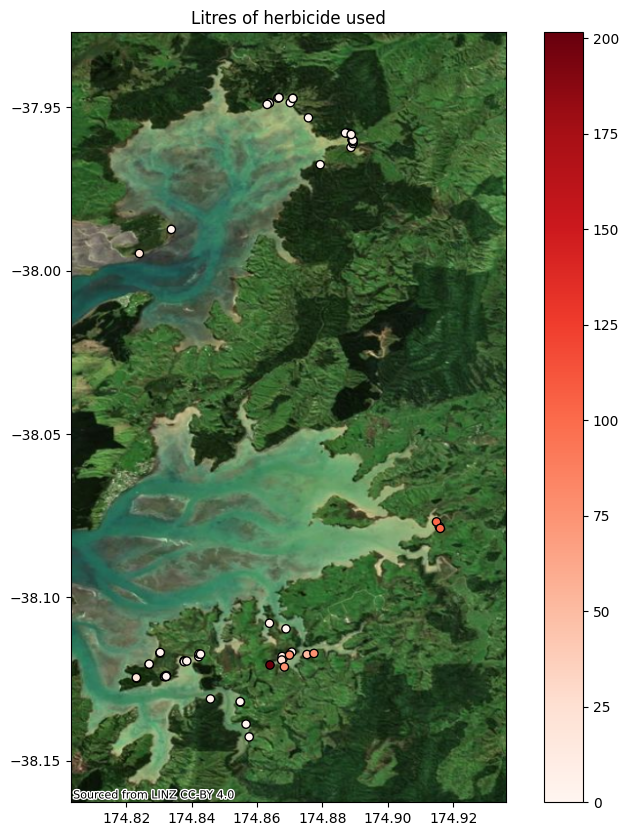

In [22]:
ax = df.sort_values("Litres").plot("Litres", figsize=(10,10), legend=True, cmap="Reds", edgecolor = "black")
ax.set_title(f"Litres of herbicide used")
ax.ticklabel_format(useOffset=False, style='plain')
xmin, ymin, xmax, ymax = df.total_bounds
pad = .02
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)
cx.add_basemap(ax, source=linz_aerial, crs=df.crs, zoom=12)
ax.figure.savefig("kawhia_herbicide.png", bbox_inches="tight", dpi=300)